In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

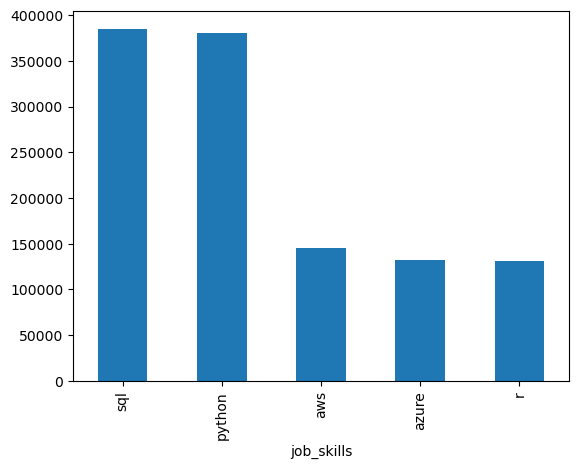

In [8]:
df_exploded['job_skills'].value_counts().head(5).plot(kind='bar')

In [11]:
skills_count = df_exploded.groupby(['job_title_short' , 'job_skills']).size()

In [15]:
df_skills_count = skills_count.reset_index(name='skills_count')

df_skills_count = df_skills_count.sort_values('skills_count',ascending=False)

df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


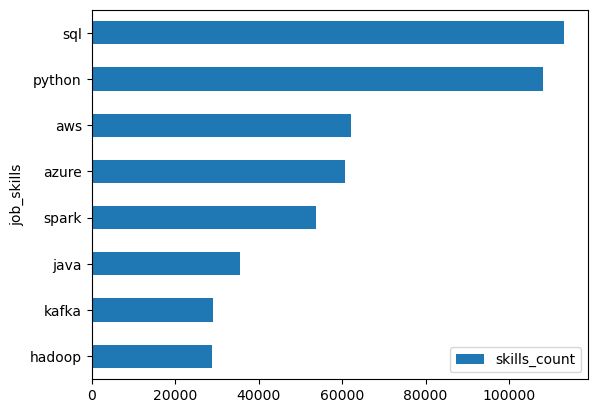

In [30]:
job_title = 'Data Engineer'
top_skills = 8

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh',x='job_skills',y='skills_count')

plt.gca().invert_yaxis()
plt.show()

In [ ]:
type(df['job_skills'][1])

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']